In [2]:
# phase 1 imports
import point
import region
import utils
import functions_template as functions
import matplotlib
import matplotlib.pyplot as plt
listOfTrajectories = utils.importTrajectories("Trajectories")

In [3]:
def listTraj(listOfTrajectories):
    trajectories = []
    for traj in listOfTrajectories:
        trajectories += [[traj]]
    return trajectories

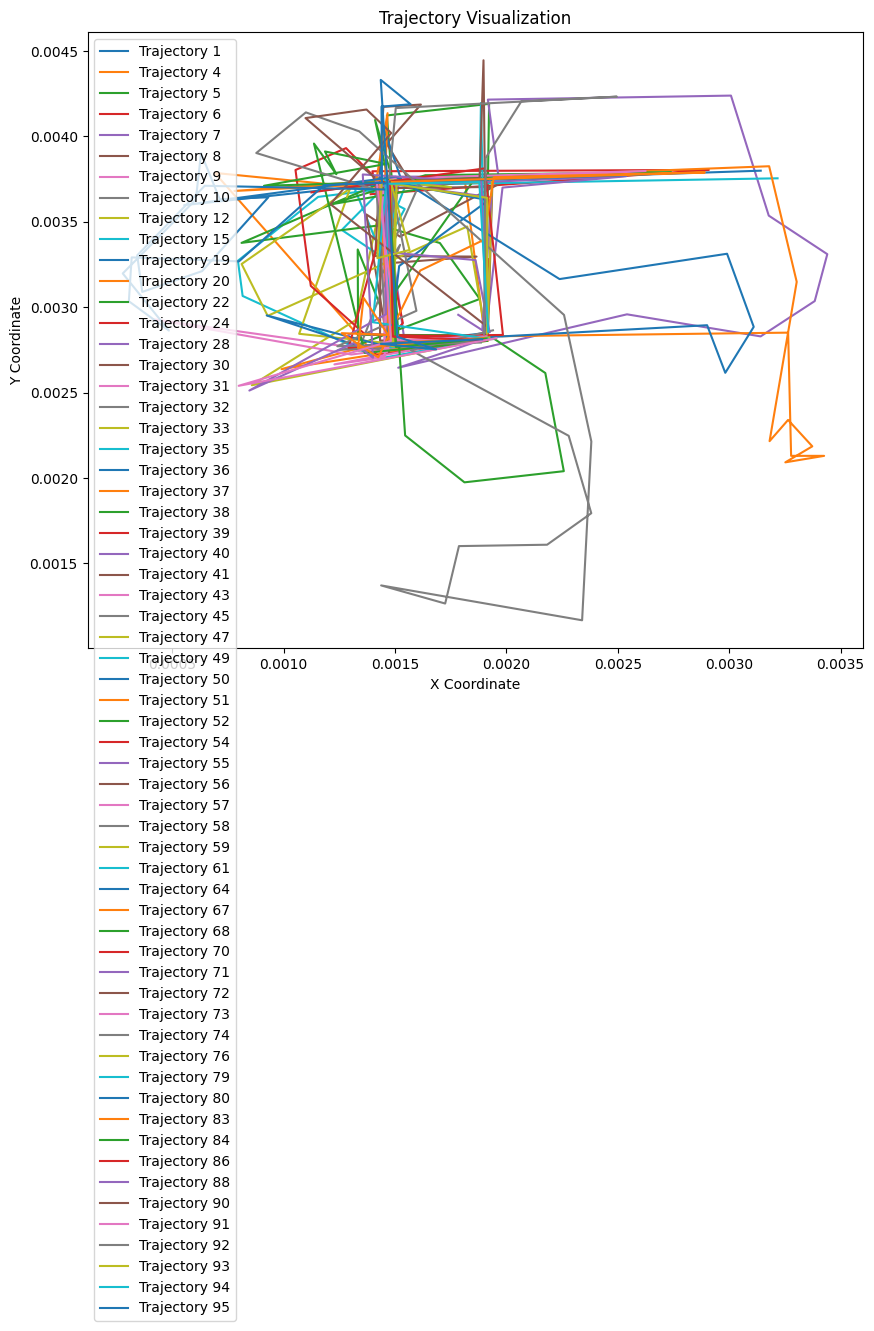

(0.0014788576577,0.0037183030576,2000-01-01:01:09:13)
(0.0016965927928,0.0037230323741,2000-01-01:01:09:25)
(0.0015009711712,0.0037330431655,2000-01-01:01:09:31)
(0.001466818018,0.0027765251799,2000-01-01:01:09:54)
(0.0019141774775,0.002826573741,2000-01-01:01:10:30)
(0.0014316036036,0.0036914073741,2000-01-01:01:11:38)
(0.0006904327027,0.0037864496403,2000-01-01:01:12:39)
(0.0013756342342,0.0027740935252,2000-01-01:01:13:18)
(0.00099005315315,0.0026376223022,2000-01-01:01:13:32)
(0.001916436036,0.0028268426259,2000-01-01:01:13:58)
(0.0014715684685,0.0037317374101,2000-01-01:01:17:17)
(0.0014101873874,0.0040962958633,2000-01-01:01:17:41)
(0.0014840702703,0.0037699109712,2000-01-01:01:17:46)
(0.0014632558559,0.0041230233813,2000-01-01:01:18:06)
(0.0019221423423,0.0041908741007,2000-01-01:01:18:21)
(0.0019063477477,0.0028441879496,2000-01-01:01:19:01)
(0.0014473693694,0.003736573741,2000-01-01:01:11:04)
(0.0014987864865,0.0027554460432,2000-01-01:01:11:48)
(0.0019110792793,0.002812345323

In [5]:
import math


class Point:
    def __init__(self, x, y):
        self.X = x
        self.Y = y

def calculateDistance(point: Point, p1: Point, p2: Point):
    m = (p2.Y - p1.Y) / (p2.X - p1.X) if (p2.X - p1.X) != 0 else math.inf
    a = m
    b = -1
    c = -(m * p1.X - p1.Y)
    d = abs((a * point.X + b * point.Y + c)) / (math.sqrt(a * a + b * b))
    return d

def douglas_peucker(points, epsilon):
    dmax = 0
    index = 0
    end = len(points)
    for i in range(1, end - 1):
        d = calculateDistance(points[i], points[0], points[end - 1])
        if d > dmax:
            index = i
            dmax = d

    if dmax > epsilon:
        rec_results1 = douglas_peucker(points[:index + 1], epsilon)
        rec_results2 = douglas_peucker(points[index:end], epsilon)

        return rec_results1[:-1] + rec_results2

    return [points[0], points[end - 1]]

def simplify_trajectories(trajectories, epsilon):
    simplified_trajectories = []
    for trajectory in trajectories:
        simplified_points = douglas_peucker(trajectory[0].points, epsilon)
        # print(trajectory[0].number, simplified_points)
        simplified_trajectories.append([simplified_points,trajectory[0].number])
    return simplified_trajectories

# Example usage:
# List of trajectories, each trajectory is represented as a list of Point objects
trajectories = listTraj(listOfTrajectories)

# Set the threshold epsilon value for simplification
epsilon = 0.0001

# Call the function to simplify all trajectories in the list
simplified_trajectories = simplify_trajectories(trajectories, epsilon)


# The 'simplified_trajectories' variable now contains the simplified version of all input trajectories.
def vis(trajectories):
    plt.figure(figsize=(10,8))
    for trajec in trajectories:
        x = []
        y = []
        for traj in trajec[0]:
            x.append(traj.X)
            y.append(traj.Y)
        plt.plot(x, y, label="Trajectory {}".format(str(trajec[1])))
     
    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    plt.title('Trajectory Visualization')
    plt.legend()
    plt.show() 
vis(simplified_trajectories)

